In [1]:
import pandas as pd
import sys
import json
import LLDA.model.labeled_lda as llda
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import jensenshannon

# sys.path.append('../')

In [2]:
with open('FRIS_data.json') as f:
    data = json.load(f)

clean_data = {}
for pro_id in data.keys():
    if data[pro_id]['publications'] and data[pro_id]['disciplines']:
        clean_data[pro_id] = data[pro_id]
print(len(clean_data))

pro_id_list = list(clean_data.keys())
for pro_id in pro_id_list:
    pubs = {}
    pro_dis_list = []
    for pub_id in clean_data[pro_id]['publications'].keys():
        if clean_data[pro_id]['publications'][pub_id]['disciplines'] and clean_data[pro_id]['publications'][pub_id]['authors']:
            pro_dis_list.extend(clean_data[pro_id]['publications'][pub_id]['disciplines'])
            pubs[pub_id] = clean_data[pro_id]['publications'][pub_id]
    
    if pubs:
        clean_data[pro_id]['publications'] = pubs
        clean_data[pro_id]['disciplines'] = list(set(pro_dis_list))
    else:
        del clean_data[pro_id]

print(len(clean_data))

444
147


In [3]:
split = 0.8
train_data = {k: clean_data[k] for k in list(clean_data.keys())[:int(split*len(clean_data))]}
test_data = {k: clean_data[k] for k in list(clean_data.keys())[int(split*len(clean_data)):]}
print(len(train_data), len(test_data))

train_project_data = {}
train_pub_data = []
for pro_id in train_data.keys():
    train_project_data[pro_id] = (train_data[pro_id]['abstract'], train_data[pro_id]['disciplines'])
    for pub_id in train_data[pro_id]['publications'].keys():
        train_pub_data.append((pub_id, train_data[pro_id]['publications'][pub_id]['abstract'], train_data[pro_id]['publications'][pub_id]['disciplines']))

test_project_data = {}
test_pub_data = []
for pro_id in test_data.keys():
    test_project_data[pro_id] = (test_data[pro_id]['abstract'], test_data[pro_id]['disciplines'])
    for pub_id in test_data[pro_id]['publications'].keys():
        test_pub_data.append((pub_id, test_data[pro_id]['publications'][pub_id]['abstract'], test_data[pro_id]['publications'][pub_id]['disciplines']))

print(len(train_project_data), len(test_project_data), len(train_pub_data), len(test_pub_data))

117 30
117 30 377 150


In [4]:
print(train_project_data[list(train_project_data.keys())[0]])
print(train_pub_data[0][1])

('Viruses have evolved to hijack key cellular components of their natural host. The VirEOS project will analyze how medically relevant viruses such as human respiratory syncytial, hepatitis E, yellow fever, Zika or Kaposi sarcoma-associated herpes virus, interfere with RNA sensing and RNA homeostasis in their host cells. The impact of identified factors on the pathogenicity and on the immune responses will then be analyzed in vivo, using infectious models. Understanding how viruses manipulate cellular RNA should not only provide new targets to the development of antiviral drugs but also help to identify important cellular hubs in RNA physiology.', ['0302', '0301', '0106', '0104', '0306'])
Objective Chronic HBV/HDV infections are a major cause of liver cancer. Current treatments can only rarely eliminate HBV and HDV. Our previously developed preS1-HDAg immunotherapy could induce neutralising antibodies to HBV in vivo and raise HBV/HDV-specific T-cells. Here, we further investigate if a 

In [5]:
# # load from disk
# llda_model_project = llda.LldaModel()
# llda_model_project.load_model_from_dir("LLDA/data_models/pro_abstracts_disciplines", load_derivative_properties=False)
# print("llda_model_project", llda_model_project)
# # print("Top-5 terms of topic 'virus': ", llda_model_project.top_terms_of_topic("virus", 5, False))
# print("Doc-Topic Matrix: \n", llda_model_project.theta)
# print("Topic-Term Matrix: \n", llda_model_project.beta)

In [6]:
llda_model_project = llda.LldaModel(labeled_documents=train_project_data.values())
print(llda_model_project)
llda_model_pub = llda.LldaModel(labeled_documents=[(pub[1], pub[2]) for pub in train_pub_data])
print(llda_model_pub)


Labeled-LDA Model:
	K = 33
	M = 117
	T = 5818
	WN = 20882
	LN = 404
	alpha = 1.5151515151515151
	eta = 0.001
	perplexity = 659.7486675913528
	

Labeled-LDA Model:
	K = 33
	M = 377
	T = 14189
	WN = 72456
	LN = 842
	alpha = 1.5151515151515151
	eta = 0.001
	perplexity = 1077.6029029150145
	


In [7]:
# training
llda_model_project.training(iteration=10, log=True)
# while True:
#     print("iteration %s sampling..." % (llda_model.iteration + 1))
#     llda_model.training(1)
#     print("after iteration: %s, perplexity: %s" % (llda_model.iteration, llda_model.perplexity()))
#     print("delta beta: %s" % llda_model.delta_beta)
#     if llda_model.is_convergent(method="beta", delta=0.01):
#         break

after iteration: 0, perplexity: 659.7486675913528
gibbs sample count:  20882
after iteration: 1, perplexity: 573.0481078537881
gibbs sample count:  20882
after iteration: 2, perplexity: 562.4246054886664
gibbs sample count:  20882
after iteration: 3, perplexity: 560.62366975756
gibbs sample count:  20882
after iteration: 4, perplexity: 556.6052332566295
gibbs sample count:  20882
after iteration: 5, perplexity: 558.000693809019
gibbs sample count:  20882
after iteration: 6, perplexity: 559.2919519920218
gibbs sample count:  20882
after iteration: 7, perplexity: 552.6926397909331
gibbs sample count:  20882
after iteration: 8, perplexity: 555.4729688290731
gibbs sample count:  20882
after iteration: 9, perplexity: 555.1339773275234
gibbs sample count:  20882


In [8]:
llda_model_pub.training(iteration=10, log=True)

after iteration: 0, perplexity: 1077.6029029150145
gibbs sample count:  72456
after iteration: 1, perplexity: 972.6421217216784
gibbs sample count:  72456
after iteration: 2, perplexity: 954.0033081842977
gibbs sample count:  72456
after iteration: 3, perplexity: 947.3930894831213
gibbs sample count:  72456
after iteration: 4, perplexity: 947.0963635921927
gibbs sample count:  72456
after iteration: 5, perplexity: 945.2261225126173
gibbs sample count:  72456
after iteration: 6, perplexity: 943.8944913757582
gibbs sample count:  72456
after iteration: 7, perplexity: 943.3057840016539
gibbs sample count:  72456
after iteration: 8, perplexity: 943.5171554022749
gibbs sample count:  72456
after iteration: 9, perplexity: 940.5158708203248
gibbs sample count:  72456


In [9]:
# # update
# print("before updating: ", llda_model)
# update_labeled_documents = [("new example test example test example test example test", ["example", "test"])]
# llda_model.update(labeled_documents=update_labeled_documents)
# print("after updating: ", llda_model)

# # train again
# # llda_model.training(iteration=10, log=True)
# while True:
#     print("iteration %s sampling..." % (llda_model.iteration + 1))
#     llda_model.training(1)
#     print("after iteration: %s, perplexity: %s" % (llda_model.iteration, llda_model.perplexity()))
#     print("delta beta: %s" % llda_model.delta_beta)
#     if llda_model.is_convergent(method="beta", delta=0.01):
#         break

In [10]:
# inference
# note: the result topics may be different for difference training, because gibbs sampling is a random algorithm
document = list(test_project_data.values())[0][0]
print(document)

topics = llda_model_project.inference(document=document, iteration=30, times=10)
# print sorted topics
sorted(topics, key=lambda x: x[0])

The core objective of the research program is to bring advanced analysis and control methods for uncertain and parameter−varying linear systems closer to engineering practice, and to mechatronic applications, such as wafer stages, pick−and−place robots, etc., in particular. To this end, the project combines (i) theoretical advances to alleviate the methods’ inherent trade−off in conservatism and computational effort; (ii) methodological developments to solve the controller design and trajectory optimization problems efficiently; and (iii) experimental implementations. The theoretical and methodological contributions are rooted in convex and robust optimization, which have a whole range of engineering applications. 


[('0101', 0.020959595959595963),
 ('0102', 0.016792929292929297),
 ('0103', 0.021792929292929298),
 ('0104', 0.032626262626262635),
 ('0106', 0.04345959595959597),
 ('0201', 0.013459595959595963),
 ('0202', 0.016792929292929297),
 ('0203', 0.017626262626262632),
 ('0204', 0.04262626262626264),
 ('0205', 0.01262626262626263),
 ('0206', 0.013459595959595963),
 ('0207', 0.01262626262626263),
 ('0208', 0.032626262626262635),
 ('0299', 0.02012626262626263),
 ('0301', 0.04262626262626264),
 ('0302', 0.021792929292929298),
 ('0303', 0.0192929292929293),
 ('0304', 0.021792929292929298),
 ('0305', 0.01512626262626263),
 ('0306', 0.0367929292929293),
 ('0401', 0.013459595959595963),
 ('0402', 0.01262626262626263),
 ('0501', 0.01845959595959596),
 ('0502', 0.014292929292929296),
 ('0503', 0.02012626262626263),
 ('0504', 0.014292929292929296),
 ('0505', 0.025126262626262632),
 ('0506', 0.0292929292929293),
 ('0507', 0.01262626262626263),
 ('0508', 0.01512626262626263),
 ('0602', 0.0126262626262626

In [11]:
documents = list(test_project_data.values())
project_matrix_test = np.zeros((len(documents), llda_model_project.K))

for i, (document, _) in enumerate(documents):
    topics = llda_model_project.inference(document=document, iteration=100, times=10)
    sorted_topics = sorted(topics, key=lambda x: x[0])
    for j, (topic, prob) in enumerate(sorted_topics):
        project_matrix_test[i, j] = prob

project_matrix_test

array([[0.0234596 , 0.01679293, 0.0284596 , 0.0334596 , 0.04429293,
        0.01429293, 0.0184596 , 0.0159596 , 0.0309596 , 0.01262626,
        0.01429293, 0.01429293, 0.02929293, 0.0184596 , 0.0434596 ,
        0.02179293, 0.02762626, 0.0209596 , 0.01679293, 0.02512626,
        0.01262626, 0.0134596 , 0.0209596 , 0.01262626, 0.01762626,
        0.01429293, 0.0259596 , 0.0184596 , 0.01262626, 0.0209596 ,
        0.0134596 , 0.01262626, 0.3334596 ],
       [0.01700159, 0.01910686, 0.02963317, 0.02121212, 0.03594896,
        0.01700159, 0.02542265, 0.02963317, 0.01805423, 0.01700159,
        0.02542265, 0.01700159, 0.01594896, 0.01594896, 0.06226475,
        0.03700159, 0.01805423, 0.01700159, 0.01594896, 0.06542265,
        0.03489633, 0.01594896, 0.01594896, 0.01594896, 0.02226475,
        0.01910686, 0.01805423, 0.02015949, 0.01700159, 0.01594896,
        0.01700159, 0.02015949, 0.24752791],
       [0.01073401, 0.0116229 , 0.01740067, 0.01073401, 0.04806734,
        0.00940067, 0.0098

In [12]:
documents = [(pub[1], pub[2]) for pub in test_pub_data]
pub_matrix_test = np.zeros((len(documents), llda_model_pub.K))

for i, (document, _) in enumerate(documents):
    topics = llda_model_pub.inference(document=document, iteration=100, times=10)
    sorted_topics = sorted(topics, key=lambda x: x[0])
    for j, (topic, prob) in enumerate(sorted_topics):
        pub_matrix_test[i, j] = prob

pub_matrix_test

array([[0.03102574, 0.01345252, 0.067009  , ..., 0.01094206, 0.0084316 ,
        0.40801319],
       [0.02660305, 0.01334338, 0.03212791, ..., 0.01058095, 0.01279089,
        0.39897874],
       [0.01086935, 0.00660705, 0.01218082, ..., 0.00693492, 0.00923   ,
        0.21414804],
       ...,
       [0.02180087, 0.01208658, 0.06351515, ..., 0.00922944, 0.00922944,
        0.23322944],
       [0.03400521, 0.01002331, 0.0303853 , ..., 0.0145482 , 0.01228575,
        0.35346222],
       [0.02486509, 0.02486509, 0.02212536, ..., 0.05637194, 0.02349523,
        0.09746783]])

In [13]:
# perplexity
# calculate perplexity on test data
perplexity = llda_model_project.perplexity(documents=map(lambda x: x[0], test_project_data),
                                   iteration=30,
                                   times=10)
print("perplexity on test data: %s" % perplexity)
# calculate perplexity on training data
print("perplexity on training data: %s" % llda_model_project.perplexity())

perplexity on test data: 4109.062108741378
perplexity on training data: 554.0909633172244


In [14]:
# perplexity
# calculate perplexity on test data
perplexity = llda_model_pub.perplexity(documents=map(lambda x: x, [pub[1] for pub in test_pub_data]),
                                   iteration=30,
                                   times=10)
print("perplexity on test data: %s" % perplexity)
# calculate perplexity on training data
print("perplexity on training data: %s" % llda_model_pub.perplexity())

perplexity on test data: 1135.0619520414227
perplexity on training data: 941.8801848198037


In [15]:
# save to disk
save_model_dir = "LLDA/data_models/topic_pro_disciplines"
# llda_model.save_model_to_dir(save_model_dir, save_derivative_properties=True)
llda_model_project.save_model_to_dir(save_model_dir)
# save to disk
save_model_dir = "LLDA/data_models/topic_pub_disciplines"
# llda_model.save_model_to_dir(save_model_dir, save_derivative_properties=True)
llda_model_pub.save_model_to_dir(save_model_dir)

In [16]:
project_matrix = np.concatenate((llda_model_project.theta, project_matrix_test))
pub_matrix = np.concatenate((llda_model_pub.theta, pub_matrix_test))

distance_matrix = np.zeros((len(project_matrix), len(pub_matrix)))

for i in range(len(project_matrix)):
    for j in range(len(pub_matrix)):
        distance_matrix[i, j] = jensenshannon(project_matrix[i], pub_matrix[j])

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# create a dataframe with row indices as project ids and column indices as publication ids
# if publication is in project, then 1, else 0
# if publication date is before project start date, then 0, else 1
# ratio of intersection of organisations from project and publication to organisations from publication
# ratio of intersection of authors from project and publication to authors from publication

pub_data = []
for pro_id in clean_data.keys():
    for pub_id in clean_data[pro_id]['publications'].keys():
        pub_data.append((pub_id, clean_data[pro_id]['publications'][pub_id]))

data_matrix = [[0.] * len(pub_data) for _ in range(len(clean_data))]
for i, pro_id in enumerate(clean_data.keys()):
    for j, pub_id in enumerate([pub[0] for pub in pub_data]):
        belongs = 1 if pub_id in clean_data[pro_id]['publications'].keys() else 0
        date = 1 if clean_data[pro_id]['start_date'] <= pub_data[j][1]['date'] else 0
        org = len(set(clean_data[pro_id]['organizations']) & set(pub_data[j][1]['organizations'])) / len(set(pub_data[j][1]['organizations']))
        auth = len(set(clean_data[pro_id]['authors']) & set(pub_data[j][1]['authors'])) / len(set(pub_data[j][1]['organizations']))
        distance = distance_matrix[i, j]
        data_matrix[i][j] = [belongs, date, org, auth, distance]

df = pd.DataFrame(data_matrix, index=clean_data.keys(), columns=[pub[0] for pub in pub_data])
df.to_csv('xgb_data.csv')
df.head()

,55975b31-3cc2-4534-a097-85b1eab6cd53,bbaf834d-f8e1-4187-84b4-a35484625c09,50ad741e-6c36-4fbb-9b48-0fa901e9f63b,383f820f-0e0c-4aee-bfb4-6ebd5f6c2b63,ca3fcf40-66cf-44cd-a51e-3cff9e189cf5,d0399103-8325-4b32-9476-3d3729793829,ae73aff3-91db-470d-bc96-ea6d2e9fe137,d640f97c-94eb-4330-9772-f19d23865d19,db848229-540e-455a-baf4-55a73676b869,8a4dc512-1865-45f1-90d6-aeb015495ac1,9674c6a9-f18f-4d91-aa5b-a2b8529240f3,accad675-6a0f-41fb-b620-980e0881a4f0,a83f4646-d3ec-4054-bb10-23cfc88faba0,b1aff172-e1e8-4606-96ba-2d404a13ff95,16f7a1da-ab4f-4597-8ec6-7f96910d0acb,9c7e1f16-6a1c-4de1-ad85-647644566623,564429ef-c14c-403c-a873-edd6ecd1b2a1,2bd01a38-c1e9-4ad5-8e8f-b8e5ac780ecd,178aa060-8c9e-482d-9116-eb0dac9beab7,5fdca7f9-be14-45ea-ac81-e8eef803c17f,2f5b49e5-1de0-472e-87dd-75a6538be19a,27a70ef5-45ca-4ca7-922e-76870cf74f37,28d65a5e-961a-4c55-9969-5003a6eddabd,147e4591-dd7b-40c0-83fc-5b7ba35f0225,d1e966b3-e709-46f5-a250-70acd89aea99,e420d00e-6cec-4147-94dc-d5d0cddd4b18,9951ea23-c2ed-449e-adac-a7fb0bf29dc2,9d5ef35f-cfd1-462d-91b3-95b3eb3d619c,53455db9-c541-4dc1-8d61-d15d38ef0b2c,940fecb7-be24-4f2a-bdbc-6be9b8bc9aaf,d85582fd-b9a9-4cc8-a043-d6f192db8cb9,00ee9344-2335-45a3-8b28-845d7060e950,a12d4c59-161d-4d4c-9d07-156a61944bb8,0b375ea2-3895-425b-af6c-13d6114dfc61,08afc51d-244a-46e0-b23c-f45b2ace35b1,03242d2a-5e3e-4d68-96fd-ad8535701084,029db07d-e65f-44c7-ae4a-95e00dfbdfc1,0594ab2b-78a0-423d-9171-033a13b1e887,b499f5f4-d7ee-4def-8b3c-e2c112bccf5b,c69a60aa-91b9-4bbd-9c6d-49ad202fd372,c5f0240f-c092-46a8-b855-31a7c08ca274,c09b5266-fc94-417e-9045-f251468bad71,4491c57b-ca46-4a89-92e1-78d0e2601aad,41bc68db-6101-4af6-90fd-8a5ef588d97d,448f38ee-7946-4d17-bd1b-a4e2a4a369d5,9269609a-d6f1-4775-bb7e-a2299555ccf6,4649f15a-a650-485a-8ba6-ff61cd98ebd2,bf59e0ca-6a22-4a04-af52-f3480c586417,e7cf6eb8-dc55-428e-b19e-c0f87173d805,f613b755-3ec7-4e75-bc11-44463cb8f0ec,b61d5a70-03be-4e2f-aa25-7fe3247117df,076f5970-29f6-4d05-98c9-0ab46bb57ab6,fe9233d2-0478-4133-86c2-6d0796371d4d,61003419-dfc3-406e-bcca-46a771393125,13bdf954-8619-475f-a56e-ea24c7703693,d80decf7-494c-44e7-9172-15ff30b1ccda,1b38b0aa-84a4-4cfc-869f-bef2c95a1f4e,fdfe147e-40c5-437c-8143-97fe6a1c134a,3bf7f8c6-134e-4c7c-ab35-4147e26001e1,6ff0e4d3-e9d0-4327-ac45-22ddcda95357,5342abe2-77e2-4938-8483-4705d684e82d,758f7459-c689-430a-acc9-ef65e036c00f,9d50ee56-a605-4695-8211-d216f8165e88,501a5725-bf6c-4a80-9b48-a63a13cdefc2,51b1ff42-1741-4433-b60b-3e8709f4d645,51b1ff42-1741-4433-b60b-3e8709f4d645,3b59ee19-4874-4bb1-a6da-76a56654510e,0700ea19-4355-4346-af47-bf18a9c6b95e,c7d0ae51-37c0-4c7f-b2f4-dda30aaa213a,9e27a031-0a8c-4221-a4d0-7c8a9e6f121e,72fe1ec0-8a1d-499a-99b3-b25ca20364f8,c4d40890-cf1d-4a47-a304-cb017422b092,d567f5ca-a157-4392-8cd8-592aa8b46e1b,cf32d3e0-e59e-4ee0-b634-9fe34d94225c,bf1bf73b-3288-4f77-9d80-ab5540d31175,2388cc8b-5498-493e-a981-b4971bdff594,8dcd5398-eded-4d26-b016-9e116415758e,7cec9636-8bd1-4e05-8364-49c4a510d66b,0b9e20fa-3c4f-4794-a523-39e387ae2add,9d0401df-4f47-4a7d-b206-2b85ccb689e5,26095ab4-5a23-4520-a7c7-ffa9f1baf8f7,3b2990be-de1d-42c3-97f8-7ef613886b66,49462a4e-b17f-4623-8126-bb9a943da64d,7fc06894-0853-4fd2-9405-bad8eee7a526,23c1e09f-06ee-490c-9876-5d7b1d0443c9,7802b19e-badf-464a-a1de-98dfd2f626dc,7c791d1b-64fe-4de6-bd4a-588afec58b3b,2b96e9d4-4476-46e1-b8f8-a8da539e8b36,f3ded410-889c-434e-a39e-65d0d01ef89f,1f7d1e6c-4c90-48c0-a22b-64f3eb3db4b3,d7e1ae59-e05c-4bbe-8da1-e7baee6e2cc6,ccae2f71-316a-4fe8-9eb4-20b2961cd0c5,a6d0c494-e5ba-4289-a492-3e4d50e99fd8,881614c1-d9f0-463f-80b9-f7807be6b992,2c0cf738-0c09-415c-a3ae-b1dd9f158f31,ccfedabd-6706-423e-a82c-508b6852e9fc,756fee77-b592-440d-a5af-ffdbae2875dc,0b420ec7-d100-41f9-8393-5a9b1ca234f2,10a41ba5-5df9-470f-8106-d4f7e3785cd1,ae8c3807-0b31-4223-a351-6bfd4c4b969b,e12df72e-5083-4f3a-943f-0b74f826735f,b3ffb522-3890-4814-ba21-21dea65f6687,3aa493ef-400e-4551-b382-008eaf244993,1aac2b7c-6e65-4a0c-9336-d08499ceec17,f61b8ffc-d202-4eb2-b534-9d7e3f0b7f03,83706115-107d-4b1f-91c2-038ba3e90f35,7169dab6-b3a7-4ce7-808b-8e629c293d92,e9cafd4f-8206-453e-9b3c-938536d7d7ce,fe1

In [18]:
# gradient boosting
# data matrix is constructed as follows: rows are projects, columns are publications
# each cell is a list of 5 elements: [belongs, date, org, auth, distance]
# outcome is whether publication is in project or not
# features are date, org, auth, distance

import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pylab as plt

In [19]:
# def get_split(split_train=0.8):
#     '''Ensures that each project and each publication is either in training or test set'''
#     project_list = []
#     for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
#         pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * gb_data[i:i + gb_raw_shape[0], -1]
#         project = pub_belongs[pub_belongs != 0][0]
#         project_list.append(project)

#     project_list = np.array(project_list)
#     unique_projects = np.unique(project_list)
#     index_list = np.zeros(len(unique_projects))
#     for i, project in enumerate(unique_projects):
#         index_list[i] = np.where(project_list == project)[0][0]

#     ratio_list = index_list / len(project_list)
#     ratio_index = np.where(ratio_list > split_train)[0][0]
#     split_index = int(index_list[ratio_index])
#     test_projects = project_list[split_index:]
#     return int(split_index * gb_raw_shape[0]), test_projects

In [20]:
gb_raw_shape = (df.shape[0], df.shape[1], len(df.iloc[0, 0]))
print(gb_raw_shape)

gb_data = []
for i in range(len(list(df))):
    gb_data.extend(df.iloc[:, i].values.tolist())
gb_data = np.array(gb_data)
print(gb_data.shape)

project_numbers = np.array(list(range(1, gb_raw_shape[0] + 1)) * gb_raw_shape[1])
# gb_data = np.hstack((gb_data, project_numbers))
# gb_data

(147, 527, 5)
(77469, 5)


In [21]:
# get the projects for lowest predictions for each publication with distance matrix
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(len(train_pub_data), distance_matrix.shape[1]):
        project_numbers_pred.append(list(np.argsort(distance_matrix[:, i] + 1))[:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

0.35
0.32
0.29
0.27666666666666667
0.23333333333333334
0.20666666666666667
0.16666666666666666
0.12
0.06666666666666667
0.04


In [22]:
X = gb_data[:, 1:]
y = gb_data[:, 0]

split = len(train_pub_data) * len(clean_data)
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

In [23]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.01
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3, 4]]'
feature_names = ['date criterion', 'organisation ratio', 'author ratio', 'distance']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round,
                      evals=[(dtest, 'test')],
                      early_stopping_rounds=1000, 
                      verbose_eval=100)

[0]	test-logloss:0.68333
[100]	test-logloss:0.20777
[200]	test-logloss:0.07838
[300]	test-logloss:0.03503
[400]	test-logloss:0.01976
[500]	test-logloss:0.01427
[600]	test-logloss:0.01211
[700]	test-logloss:0.01130
[800]	test-logloss:0.01084
[900]	test-logloss:0.01074
[1000]	test-logloss:0.01070
[1100]	test-logloss:0.01072
[1200]	test-logloss:0.01086
[1300]	test-logloss:0.01090
[1400]	test-logloss:0.01092
[1500]	test-logloss:0.01095
[1600]	test-logloss:0.01101
[1700]	test-logloss:0.01106
[1800]	test-logloss:0.01112
[1900]	test-logloss:0.01117
[1946]	test-logloss:0.01118


In [24]:
# xgb_cv = xgb.cv(params,
#                 dtrain,
#                 num_boost_round=num_boost_round,
#                 nfold=5,
#                 early_stopping_rounds=200,
#                 verbose_eval=100)

# # plot xgb_cv
# fig, ax = plt.subplots()
# ax.plot(xgb_cv['train-logloss-mean'], label='train')
# ax.plot(xgb_cv['test-logloss-mean'], label='test')
# ax.legend()
# plt.show()

In [25]:
# make prediction
y_pred = xgb_model.predict(dtest)

# get the projects for highest 3 predictions for each publication
project_numbers_pred = []
for i in range(0, len(y_pred), gb_raw_shape[0]):
    project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:3])

project_numbers_pred

[[118, 131, 125],
 [118, 124, 136],
 [119, 141, 120],
 [119, 139, 145],
 [119, 105, 19],
 [119, 136, 121],
 [119, 131, 128],
 [119, 125, 140],
 [119, 133, 146],
 [119, 129, 131],
 [120, 135, 101],
 [120, 122, 135],
 [120, 124, 135],
 [127, 121, 7],
 [132, 124, 121],
 [121, 127, 59],
 [121, 127, 7],
 [121, 127, 59],
 [121, 127, 59],
 [121, 127, 135],
 [121, 127, 59],
 [127, 121, 59],
 [134, 132, 127],
 [147, 136, 127],
 [121, 142, 134],
 [122, 65, 142],
 [122, 65, 118],
 [123, 124, 132],
 [124, 132, 123],
 [124, 132, 134],
 [124, 132, 134],
 [124, 132, 134],
 [125, 133, 126],
 [125, 133, 118],
 [126, 108, 3],
 [127, 121, 7],
 [128, 96, 5],
 [129, 35, 104],
 [130, 103, 138],
 [131, 136, 145],
 [131, 136, 119],
 [131, 123, 145],
 [124, 132, 134],
 [124, 132, 123],
 [133, 130, 142],
 [133, 129, 142],
 [134, 131, 141],
 [132, 123, 134],
 [135, 120, 11],
 [136, 131, 128],
 [146, 137, 127],
 [146, 137, 128],
 [146, 137, 6],
 [146, 137, 120],
 [146, 137, 131],
 [146, 137, 131],
 [137, 146, 147

In [26]:
project_lists = []
for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
    pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
    project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
    project_lists.append(project)

project_lists_test = project_lists[len(train_pub_data):]
project_lists_test

[[118],
 [118],
 [119],
 [119],
 [119],
 [119],
 [119],
 [119],
 [119],
 [119],
 [120],
 [120],
 [120],
 [121],
 [121],
 [121],
 [121],
 [121],
 [121],
 [121],
 [121],
 [121],
 [121],
 [121],
 [121],
 [122],
 [122, 65],
 [123],
 [132, 124],
 [132, 124],
 [124],
 [124],
 [125],
 [125],
 [126],
 [127],
 [128],
 [129],
 [130],
 [131],
 [131],
 [131],
 [132, 124],
 [132, 124],
 [133],
 [133],
 [134],
 [134],
 [135, 11],
 [136],
 [137],
 [137],
 [137],
 [137],
 [137],
 [137],
 [137],
 [138],
 [138],
 [138],
 [139],
 [139],
 [139],
 [139],
 [139],
 [139],
 [139],
 [139],
 [139],
 [140],
 [140],
 [140],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [141],
 [142],
 [142],
 [142],
 [142],
 [142],
 [142],
 [142],
 [142],
 [142],
 [143],
 [143],
 [143, 114],
 [143],
 [143],
 [143, 114],
 [143],
 [143],
 [143],
 [143],
 [143],
 [143],
 [143],
 [143],
 [143],
 [143],
 [143],
 [144],
 [

In [27]:
# calculate accuracy
accuracy_list = []
for i, project_list in enumerate(list(project_lists_test)):
    ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
    accuracy_list.append(ratio)

accuracy = sum(accuracy_list) / len(accuracy_list)
print(accuracy)

0.9866666666666667


In [28]:
# get indices of accuracy_list different than 1
indices = [i for i, x in enumerate(accuracy_list) if x != 1]
print(indices)
print([project_numbers_pred[i] for i in indices])
print([project_lists_test[i] for i in indices])

[22, 23]
[[134, 132, 127], [147, 136, 127]]
[[121], [121]]


In [29]:
# make two predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
project_numbers_pred = []
for i in range(0, len(y_pred), gb_raw_shape[0]):
    project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:2])

project_lists = []
for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
    pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
    project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
    project_lists.append(project)

project_lists_test = project_lists[len(train_pub_data):]

# calculate accuracy
# use y_test as mask for project_numbers_test
accuracy_list = []
for i, project_list in enumerate(list(project_lists_test)):
    ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
    accuracy_list.append(ratio)

accuracy = sum(accuracy_list) / len(accuracy_list)
print(accuracy)

0.97


In [30]:
# make single prediction for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
project_numbers_pred = []
for i in range(0, len(y_pred), gb_raw_shape[0]):
    project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:1])

project_lists = []
for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
    pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
    project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
    project_lists.append(project)

project_lists_test = project_lists[len(train_pub_data):]

# calculate accuracy
accuracy_list = []
for i, project_list in enumerate(list(project_lists_test)):
    accuracy = 1 if project_numbers_pred[i][0] in project_list else 0
    accuracy_list.append(accuracy)

accuracy = sum(accuracy_list) / len(accuracy_list)
print(accuracy)

0.9


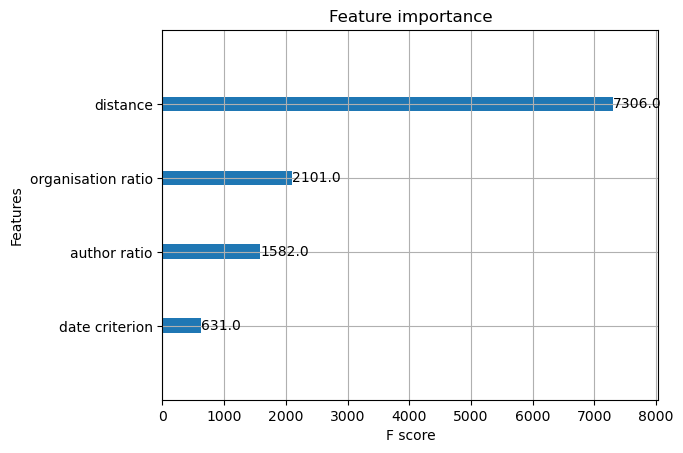

In [31]:
plot_importance(xgb_model)
plt.show()

[0]	test-logloss:0.59940
[100]	test-logloss:0.01120
[200]	test-logloss:0.01176
[300]	test-logloss:0.01182
[400]	test-logloss:0.01201
[500]	test-logloss:0.01203
[600]	test-logloss:0.01207
[700]	test-logloss:0.01244
[800]	test-logloss:0.01261
[900]	test-logloss:0.01264
[1000]	test-logloss:0.01270
[1094]	test-logloss:0.01280
1.0
1.0
0.9966666666666667
0.9966666666666667
0.99
0.9833333333333333
0.9766666666666667
0.9566666666666667
0.93
0.8333333333333334


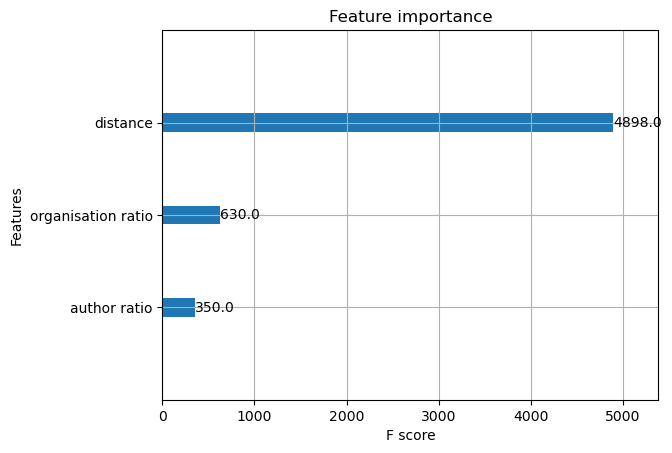

In [32]:
# drop date column
gb_data_no_date = np.delete(gb_data, 1, 1)

X = gb_data_no_date[:, 1:]
y = gb_data_no_date[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1
}

# params_constrained = params.copy()
# params_constrained['interaction_constraints'] = '[[0, 1, 2, 3]]'
feature_names = ['organisation ratio', 'author ratio', 'distance']
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=feature_names, enable_categorical=True)

num_boost_round = 10000
xgb_model = xgb.train(params, 
                      dtrain, 
                      num_boost_round, 
                      evals=[(dtest, 'test')], 
                      early_stopping_rounds=1000, 
                      verbose_eval=100)

# make three predictions for each publication
y_pred = xgb_model.predict(dtest)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

plot_importance(xgb_model)
plt.show()

In [33]:
# support vector machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X = gb_data[:, 1:]
y = gb_data[:, 0]

X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
svc = SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)
print(clf.best_params_)

# make prediction
y_pred = clf.predict(X_test)

# get the projects for the highest prediction for each publication
for num_top in range(10, 0, -1):
    project_numbers_pred = []
    for i in range(0, len(y_pred), gb_raw_shape[0]):
        project_numbers_pred.append(list(np.argsort(y_pred[i:i+gb_raw_shape[0]]) + 1)[::-1][:num_top])

    project_lists = []
    for i in range(0, gb_data.shape[0], gb_raw_shape[0]):
        pub_belongs = gb_data[i:i + gb_raw_shape[0], 0] * project_numbers[i:i + gb_raw_shape[0]]
        project = sorted(list(pub_belongs[pub_belongs != 0].astype(int)), reverse=True)
        project_lists.append(project)

    project_lists_test = project_lists[len(train_pub_data):]

    # calculate accuracy
    # use y_test as mask for project_numbers_test
    accuracy_list = []
    for i, project_list in enumerate(list(project_lists_test)):
        ratio = len(set(project_numbers_pred[i]) & set(project_list)) / len(set(project_list))
        accuracy_list.append(ratio)

    accuracy = sum(accuracy_list) / len(accuracy_list)
    print(accuracy)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.20666666666666667
0.20666666666666667
0.20666666666666667
0.20666666666666667
0.20666666666666667
0.20666666666666667
0.20666666666666667
0.20666666666666667
0.20666666666666667
0.18666666666666668
